### Importing Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%notebook inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score


from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

### Reading file

In [3]:
df = pd.read_csv("Asteroid.csv")

C:\Users\Divyansh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (11,14,15,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,full_name,a,e,G,i,om,w,q,ad,per_y,...,rot_per,GM,BV,UB,IR,spec_B,spec_T,neo,pha,moid
0,1 Ceres,2.769165,0.076009,0.12,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,...,9.074170,62.6284,0.713,0.426,NaN,C,G,N,N,1.59478
1,2 Pallas,2.772466,0.230337,0.11,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,...,7.813200,14.3000,0.635,0.284,NaN,B,B,N,N,1.23324
2,3 Juno,2.669150,0.256942,0.32,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,...,7.210000,NaN,0.824,0.433,NaN,Sk,S,N,N,1.03454
3,4 Vesta,2.361418,0.088721,0.32,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,...,5.342128,17.8000,0.782,0.492,NaN,V,V,N,N,1.13948
4,5 Astraea,2.574249,0.191095,NaN,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,...,16.806000,NaN,0.826,0.411,NaN,S,S,N,N,1.09589


In [5]:
df.shape

(839736, 27)

In [6]:
df.isna().sum()

full_name              0
a                      2
e                      0
G                 839617
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15789
condition_code       993
n_obs_used             0
H                   2694
diameter          702055
extent            839718
albedo            703284
rot_per           820940
GM                839722
BV                838715
UB                838757
IR                839735
spec_B            838070
spec_T            838756
neo                    6
pha                16922
moid               16922
dtype: int64

In [7]:
df.describe()

,a,e,G,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,albedo,rot_per,GM,BV,UB,IR,moid
count,839734.000000,839736.000000,119.000000,839736.000000,839736.000000,839736.000000,839736.000000,839730.000000,839735.000000,823947.000000,839736.000000,837042.000000,136452.000000,18796.000000,1.400000e+01,1021.000000,979.000000,1.00,8.228140e+05
mean,2.843217,0.155633,0.178739,8.950009,168.501641,181.076593,2.404732,3.385707,6.859544,5660.187025,254.617708,16.786069,0.130052,21.136772,7.821928e+00,0.769212,0.364396,-0.33,1.423511e+00
std,37.327031,0.093888,0.134603,6.666273,103.096571,104.024110,2.233138,12.746419,252.172503,4192.420393,363.004548,1.821274,0.109983,73.131751,1.678880e+01,0.088625,0.095780,NaN,2.251048e+00
min,-32588.942986,0.000000,-0.250000,0.007546,0.000388,0.001666,0.070511,0.773684,0.000000,0.000000,2.000000,-1.100000,0.001000,0.004389,2.100000e-09,0.580000,0.120000,-0.33,3.437640e-07
25%,2.385244,0.091453,0.100000,4.069043,80.212344,91.039551,1.971939,2.775342,3.683896,3599.000000,50.000000,15.900000,0.053000,4.210000,1.022225e-03,0.700000,0.289000,-0.33,9.785395e-01
50%,2.644219,0.143654,0.190000,7.257311,160.296065,181.669812,2.225494,3.037745,4.299860,5792.000000,118.000000,16.800000,0.078000,6.653000,6.192500e-01,0.743000,0.360000,-0.33,1.237880e+00
75%,2.996035,0.199400,0.250000,12.256026,252.206645,271.523344,2.578162,3.357958,5.185951,7228.000000,292.000000,17.600000,0.188000,12.624250,6.500000e+00,0.850000,0.439000,-0.33,1.590610e+00
max,3043.149073,1.201134,0.600000,175.188725,359.999800,359.999833,80.424175,6081.841956,167877.712688,72684.000000,9325.000000,33.200000,1.000000,3240.000000,6.262840e+01,1.077000,0.655000,-0.33,7.950130e+01


In [8]:
df.dtypes

full_name          object
a                 float64
e                 float64
G                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code     object
n_obs_used          int64
H                 float64
diameter           object
extent             object
albedo            float64
rot_per           float64
GM                float64
BV                float64
UB                float64
IR                float64
spec_B             object
spec_T             object
neo                object
pha                object
moid              float64
dtype: object

### Dropping rows where diameter is null

In [9]:
df[df["diameter"].isna()].shape

(702055, 27)

In [10]:
df1  = df[~df["diameter"].isna()]

In [11]:
df1.shape

(137681, 27)

In [12]:
df1.isna().sum()

full_name              0
a                      0
e                      0
G                 137562
i                      0
om                     0
w                      0
q                      0
ad                     0
per_y                  0
data_arc             140
condition_code         0
n_obs_used             0
H                    751
diameter               0
extent            137665
albedo              1232
rot_per           126493
GM                137667
BV                136676
UB                136716
IR                137680
spec_B            136311
spec_T            136716
neo                    0
pha                    0
moid                   0
dtype: int64

### Dropping columns having majority null values

In [13]:
df2 = df1.drop(["G", "extent", "rot_per", "GM", "BV", "UB", "IR", "spec_B", "spec_T"], axis=1)

In [14]:
df2.head()

,full_name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,albedo,neo,pha,moid
0,1 Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,939.4,0.0900,N,N,1.59478
1,2 Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,545,0.1010,N,N,1.23324
2,3 Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,246.596,0.2140,N,N,1.03454
3,4 Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,525.4,0.4228,N,N,1.13948
4,5 Astraea,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,0,2861,6.85,106.699,0.2740,N,N,1.09589


In [15]:
df2.shape

(137681, 18)

In [16]:
df2.isna().sum()

full_name            0
a                    0
e                    0
i                    0
om                   0
w                    0
q                    0
ad                   0
per_y                0
data_arc           140
condition_code       0
n_obs_used           0
H                  751
diameter             0
albedo            1232
neo                  0
pha                  0
moid                 0
dtype: int64

### Filling missing values

In [17]:
def fill(x, fill_with):
    
    if fill_with=="mean":
        return x.fillna(x.mean())
    
    return x.fillna(x.mode())

In [18]:
df3 = fill(df2, "mean")

In [19]:
df3.isna().sum()

full_name         0
a                 0
e                 0
i                 0
om                0
w                 0
q                 0
ad                0
per_y             0
data_arc          0
condition_code    0
n_obs_used        0
H                 0
diameter          0
albedo            0
neo               0
pha               0
moid              0
dtype: int64

In [20]:
df3.describe()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,albedo,moid
count,137681.000000,137681.000000,137681.000000,137681.000000,137681.000000,137681.000000,137681.000000,137681.000000,137681.000000,137681.000000,137681.000000,137681.00000,137681.000000
mean,2.814524,0.145478,10.350850,169.828953,181.899755,2.402551,3.226496,4.883985,8908.726380,659.420951,15.177323,0.13005,1.420091
std,1.522512,0.077571,6.835959,102.713335,103.557593,0.516136,2.895918,25.528400,6147.364458,581.894272,1.403763,0.10949,0.512207
min,0.626226,0.000489,0.021855,0.000735,0.004466,0.081882,0.999956,0.495569,1.000000,5.000000,3.200000,0.00100,0.000166
25%,2.536647,0.089611,5.121634,82.330040,91.936169,2.068879,2.864377,4.040156,6266.000000,214.000000,14.400000,0.05300,1.082470
50%,2.750781,0.138538,9.391666,160.438501,183.662427,2.363854,3.167360,4.562389,7497.000000,483.000000,15.300000,0.07900,1.384900
75%,3.092506,0.191134,13.742347,256.279729,271.761175,2.685776,3.468510,5.438437,9652.000000,958.000000,16.100000,0.18700,1.699330
max,389.145964,0.984348,170.323647,359.990858,359.995174,40.465671,772.201080,7676.742943,72684.000000,9325.000000,29.900000,1.00000,39.507000


In [21]:
df3.shape

(137681, 18)

### Preprocessing

In [22]:
df3.dtypes

full_name          object
a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code     object
n_obs_used          int64
H                 float64
diameter           object
albedo            float64
neo                object
pha                object
moid              float64
dtype: object

In [23]:
df3["diameter"].head()

0      939.4
1        545
2    246.596
3      525.4
4    106.699
Name: diameter, dtype: object

In [24]:
df3["diameter"]  = df3["diameter"].astype(np.float64)

In [25]:
df3["condition_code"].head()

0    0
1    0
2    0
3    0
4    0
Name: condition_code, dtype: object

In [26]:
df3["condition_code"].value_counts()

0      126193
9        5679
0        2017
9.0       872
1         809
1         563
2         302
5         242
6         152
4         144
3         135
7         129
2          95
5.0        92
7.0        78
8          49
6.0        36
4.0        33
3          33
8.0        28
Name: condition_code, dtype: int64

In [27]:
df3["condition_code"]  = df3["condition_code"].astype(np.float64)

In [28]:
df3["neo"].head()

0    N
1    N
2    N
3    N
4    N
Name: neo, dtype: object

In [29]:
df3["pha"].head()

0    N
1    N
2    N
3    N
4    N
Name: pha, dtype: object

In [30]:
print(df3["neo"].value_counts())
print(df3["pha"].value_counts())

N    136831
Y       850
Name: neo, dtype: int64
N    137460
Y       221
Name: pha, dtype: int64


In [31]:
df3["neo"] = df3["neo"].replace({"Y": 1, "N": 0})
df3["pha"] = df3["pha"].replace({"Y": 1, "N": 0})


In [32]:
df3.drop("full_name",axis=1, inplace=True)

In [33]:
df3.dtypes

a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code    float64
n_obs_used          int64
H                 float64
diameter          float64
albedo            float64
neo                 int64
pha                 int64
moid              float64
dtype: object

### EDA 

In [34]:
sns.set_style("darkgrid")

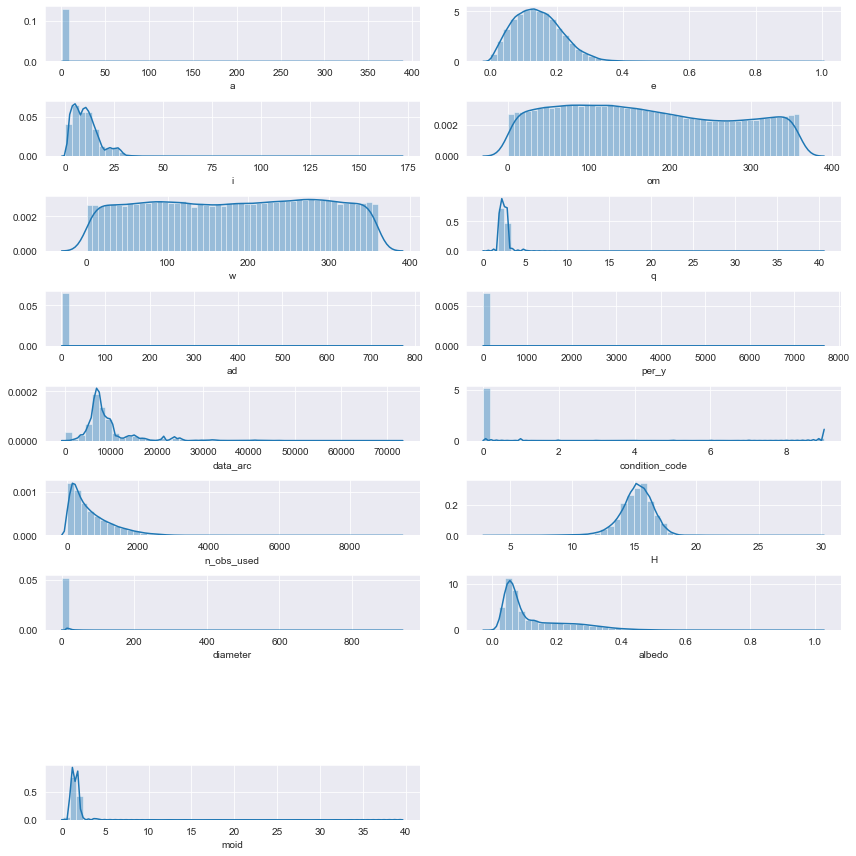

In [35]:
plt.figure(figsize=(12,12))
plt.title("Data Distribution")
for i, col in enumerate(df3.columns):
    if col!="neo" and col!="pha":
        plt.subplot(9,2, i+1)
        sns.distplot(df3[col])
        plt.tight_layout()

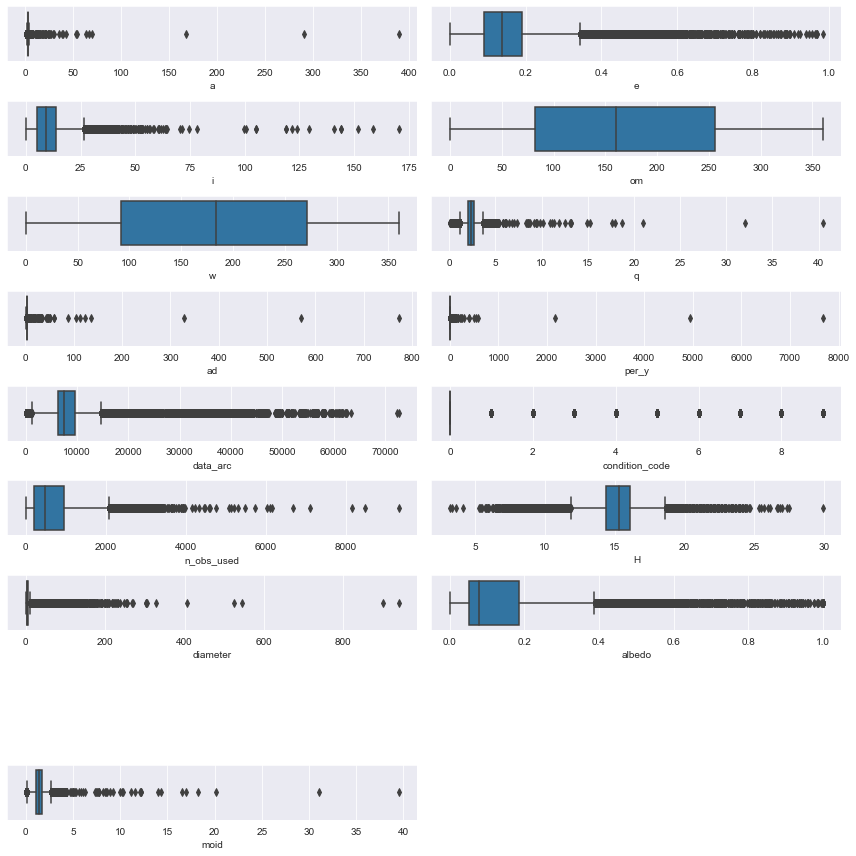

In [36]:
plt.figure(figsize=(12,12))
plt.title("Data Distribution")
for i, col in enumerate(df3.columns):
    if col!="neo" and col!="pha":
        plt.subplot(9,2, i+1)
        sns.boxplot(df3[col])
        plt.tight_layout()

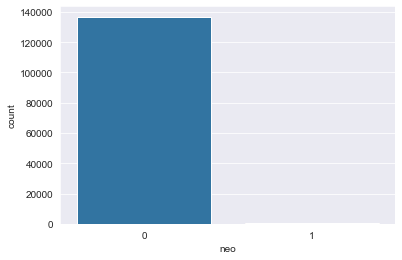

In [37]:
sns.countplot(df3["neo"])

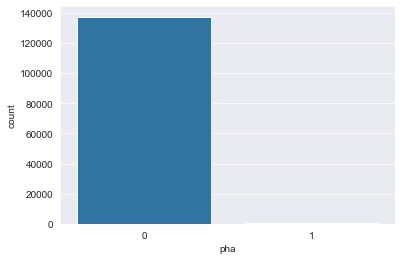

In [38]:
sns.countplot(df3["pha"])

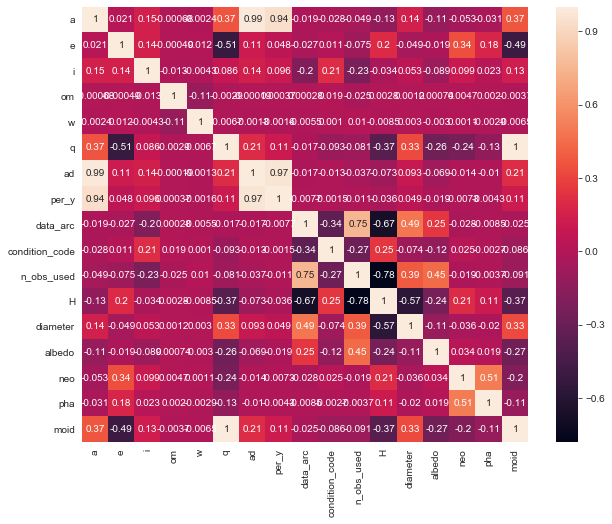

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(df3.corr(), annot=True)

### Removing rows where neo and ph are 1

In [40]:
df4 = df3[(df3["neo"]!=1) & (df3["pha"]!=1)]

### Outlier Treatment

In [41]:
cols = list(df3.columns)
cols_to_leave = ["om", "w"]
cols2  = [col for col in cols if col not in cols_to_leave]

In [42]:
cols2

['a',
 'e',
 'i',
 'q',
 'ad',
 'per_y',
 'data_arc',
 'condition_code',
 'n_obs_used',
 'H',
 'diameter',
 'albedo',
 'neo',
 'pha',
 'moid']

In [43]:
def removeOutliers(col, df):
    
    df1 = df.copy()
    
    df1["zscore_" + col] = ((df1[col]-df1[col].mean()) / df1[col].std())
    bool_series = np.abs(df1["zscore_" + col])<3
    
    df1 = df1[bool_series]
    display(df1.head())
    display(df1.shape)
    print("outliers removed:", df.shape[0] - df1.shape[0])
    print("="*20)
    
    return df1
    

In [44]:
for col in cols2:
    print(col)
    df5 = removeOutliers(col, df3) 

a


,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,albedo,neo,pha,moid,zscore_a
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0.0,1002,3.34,939.400,0.0900,0,0,1.59478,-0.029792
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0.0,8490,4.13,545.000,0.1010,0,0,1.23324,-0.027624
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0.0,7104,5.33,246.596,0.2140,0,0,1.03454,-0.095483
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0.0,9325,3.20,525.400,0.4228,0,0,1.13948,-0.297604
4,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,0.0,2861,6.85,106.699,0.2740,0,0,1.09589,-0.157815


(137628, 18)

outliers removed: 53
e


,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,albedo,neo,pha,moid,zscore_e
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0.0,1002,3.34,939.400,0.0900,0,0,1.59478,-0.895548
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0.0,8490,4.13,545.000,0.1010,0,0,1.23324,1.093947
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0.0,7104,5.33,246.596,0.2140,0,0,1.03454,1.436928
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0.0,9325,3.20,525.400,0.4228,0,0,1.13948,-0.731668
4,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,0.0,2861,6.85,106.699,0.2740,0,0,1.09589,0.588060


(136697, 18)

outliers removed: 984
i


,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,albedo,neo,pha,moid,zscore_i
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0.0,1002,3.34,939.400,0.0900,0,0,1.594780,0.035579
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0.0,7104,5.33,246.596,0.2140,0,0,1.034540,0.385911
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0.0,9325,3.20,525.400,0.4228,0,0,1.139480,-0.469441
4,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,0.0,2861,6.85,106.699,0.2740,0,0,1.095890,-0.729066
5,2.425160,0.203007,14.737901,138.640203,239.807490,1.932835,2.917485,3.776755,62329.0,0.0,6034,5.71,185.180,0.2679,0,0,0.973965,0.641761


(137013, 18)

outliers removed: 668
q


,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,albedo,neo,pha,moid,zscore_q
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0.0,1002,3.34,939.400,0.0900,0,0,1.59478,0.302502
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0.0,8490,4.13,545.000,0.1010,0,0,1.23324,-0.520573
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0.0,7104,5.33,246.596,0.2140,0,0,1.03454,-0.812226
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0.0,9325,3.20,525.400,0.4228,0,0,1.13948,-0.485612
4,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,0.0,2861,6.85,106.699,0.2740,0,0,1.09589,-0.620432


(135408, 18)

outliers removed: 2273
ad


,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,albedo,neo,pha,moid,zscore_ad
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0.0,1002,3.34,939.400,0.0900,0,0,1.59478,-0.085241
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0.0,8490,4.13,545.000,0.1010,0,0,1.23324,0.063735
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0.0,7104,5.33,246.596,0.2140,0,0,1.03454,0.044363
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0.0,9325,3.20,525.400,0.4228,0,0,1.13948,-0.226377
4,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,0.0,2861,6.85,106.699,0.2740,0,0,1.09589,-0.055362


(137628, 18)

outliers removed: 53
per_y


,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,albedo,neo,pha,moid,zscore_per_y
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0.0,1002,3.34,939.400,0.0900,0,0,1.59478,-0.010803
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0.0,8490,4.13,545.000,0.1010,0,0,1.23324,-0.010480
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0.0,7104,5.33,246.596,0.2140,0,0,1.03454,-0.020494
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0.0,9325,3.20,525.400,0.4228,0,0,1.13948,-0.049167
4,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,0.0,2861,6.85,106.699,0.2740,0,0,1.09589,-0.029522


(137654, 18)

outliers removed: 27
data_arc


,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,albedo,neo,pha,moid,zscore_data_arc
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0.0,1002,3.34,939.400,0.0900,0,0,1.594780,-0.014108
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0.0,9325,3.20,525.400,0.4228,0,0,1.139480,2.501767
15,2.923814,0.133568,3.096005,150.045666,228.823071,2.533285,3.314343,4.999571,12856.0,0.0,2364,5.90,226.000,0.1203,0,0,1.535800,0.642108
616,5.215835,0.138432,22.048300,44.351815,307.949164,4.493797,5.937873,11.912254,7787.0,0.0,3955,8.19,140.362,0.0470,0,0,3.540500,-0.182473
1044,2.358475,0.159870,0.264809,267.678919,166.915346,1.981426,2.735524,3.622055,23892.0,0.0,2674,13.00,6.104,0.3280,0,0,0.996277,2.437349


(134960, 18)

outliers removed: 2721
condition_code


,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,albedo,neo,pha,moid,zscore_condition_code
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0.0,1002,3.34,939.400,0.0900,0,0,1.59478,-0.247527
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0.0,8490,4.13,545.000,0.1010,0,0,1.23324,-0.247527
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0.0,7104,5.33,246.596,0.2140,0,0,1.03454,-0.247527
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0.0,9325,3.20,525.400,0.4228,0,0,1.13948,-0.247527
4,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,0.0,2861,6.85,106.699,0.2740,0,0,1.09589,-0.247527


(130846, 18)

outliers removed: 6835
n_obs_used


,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,albedo,neo,pha,moid,zscore_n_obs_used
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0.0,1002,3.34,939.400,0.0900,0,0,1.59478,0.588731
12,2.575981,0.085121,16.536123,43.221917,80.544831,2.356710,2.795252,4.134492,61531.0,0.0,2359,6.74,222.792,0.0700,0,0,1.43633,2.920770
15,2.923814,0.133568,3.096005,150.045666,228.823071,2.533285,3.314343,4.999571,12856.0,0.0,2364,5.90,226.000,0.1203,0,0,1.53580,2.929362
22,2.625683,0.234984,10.114258,66.846814,60.636814,2.008690,3.242677,4.254727,59343.0,0.0,2213,6.95,107.530,0.2536,0,0,1.04633,2.669865
25,2.654331,0.090145,3.563413,45.777981,193.449799,2.415057,2.893605,4.324549,57907.0,0.0,2259,7.40,94.800,0.1966,0,0,1.40287,2.748917


(135971, 18)

outliers removed: 1710
H


,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,albedo,neo,pha,moid,zscore_H
154,2.755993,0.277138,11.387527,40.994893,45.859915,1.992201,3.519784,4.575360,52511.0,0.0,2202,11.39,39.605,0.0270,0,0,1.025790,-2.697978
156,2.580690,0.196776,12.162353,62.052897,46.465391,2.072873,3.088506,4.145833,41918.0,0.0,1725,11.10,19.959,0.1730,0,0,1.109150,-2.904565
219,2.348694,0.257098,7.594573,257.884712,78.597602,1.744849,2.952540,3.599548,32296.0,0.0,2367,11.20,31.738,0.0690,0,0,0.753942,-2.833328
227,2.201791,0.242027,2.536221,313.311388,18.989047,1.668898,2.734684,3.267174,46327.0,0.0,2550,12.48,9.300,0.2082,0,0,0.657747,-1.921494
243,2.174351,0.136948,2.845254,208.972297,166.434281,1.876577,2.472124,3.206288,49167.0,0.0,2453,11.90,11.077,0.2560,0,0,0.876976,-2.334669


(135886, 18)

outliers removed: 1795
diameter


,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,albedo,neo,pha,moid,zscore_diameter
130,2.432107,0.067523,4.961349,65.660345,160.447843,2.267883,2.596331,3.792995,53226.0,0.0,3100,10.03,31.337,0.246,0,0,1.25850,2.755082
148,2.175205,0.064776,0.939377,159.609174,250.943855,2.034303,2.316107,3.208178,46715.0,0.0,2809,10.79,23.719,0.152,0,0,1.04413,1.943301
156,2.580690,0.196776,12.162353,62.052897,46.465391,2.072873,3.088506,4.145833,41918.0,0.0,1725,11.10,19.959,0.173,0,0,1.10915,1.542632
169,2.553787,0.063621,14.377379,301.297355,158.488734,2.391313,2.716260,4.081174,43680.0,0.0,2055,9.39,33.136,0.282,0,0,1.41245,2.946785
179,2.722265,0.166728,0.867340,311.869437,176.206934,2.268386,3.176143,4.491627,36648.0,0.0,2579,10.31,23.440,0.242,0,0,1.28384,1.913571


(136411, 18)

outliers removed: 1270
albedo


,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,albedo,neo,pha,moid,zscore_albedo
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0.0,1002,3.34,939.400,0.0900,0,0,1.59478,-0.365784
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0.0,8490,4.13,545.000,0.1010,0,0,1.23324,-0.265319
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0.0,7104,5.33,246.596,0.2140,0,0,1.03454,0.766736
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0.0,9325,3.20,525.400,0.4228,0,0,1.13948,2.673754
4,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,0.0,2861,6.85,106.699,0.2740,0,0,1.09589,1.314730


(136193, 18)

outliers removed: 1488
neo


,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,albedo,neo,pha,moid,zscore_neo
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0.0,1002,3.34,939.400,0.0900,0,0,1.59478,-0.078816
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0.0,8490,4.13,545.000,0.1010,0,0,1.23324,-0.078816
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0.0,7104,5.33,246.596,0.2140,0,0,1.03454,-0.078816
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0.0,9325,3.20,525.400,0.4228,0,0,1.13948,-0.078816
4,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,0.0,2861,6.85,106.699,0.2740,0,0,1.09589,-0.078816


(136831, 18)

outliers removed: 850
pha


,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,albedo,neo,pha,moid,zscore_pha
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0.0,1002,3.34,939.400,0.0900,0,0,1.59478,-0.040096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0.0,8490,4.13,545.000,0.1010,0,0,1.23324,-0.040096
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0.0,7104,5.33,246.596,0.2140,0,0,1.03454,-0.040096
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0.0,9325,3.20,525.400,0.4228,0,0,1.13948,-0.040096
4,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,0.0,2861,6.85,106.699,0.2740,0,0,1.09589,-0.040096


(137460, 18)

outliers removed: 221
moid


,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,albedo,neo,pha,moid,zscore_moid
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0.0,1002,3.34,939.400,0.0900,0,0,1.59478,0.341051
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0.0,8490,4.13,545.000,0.1010,0,0,1.23324,-0.364796
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0.0,7104,5.33,246.596,0.2140,0,0,1.03454,-0.752725
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0.0,9325,3.20,525.400,0.4228,0,0,1.13948,-0.547847
4,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,0.0,2861,6.85,106.699,0.2740,0,0,1.09589,-0.632950


(135766, 18)

outliers removed: 1915


### Defing ML Models 

In [45]:
models = {
    "                     Linear Regression": LinearRegression(),
    " Linear Regression (L2 Regularization)": Ridge(),
    " Linear Regression (L1 Regularization)": Lasso(),
   "               Random Forest Regressor": RandomForestRegressor(),
}

### Creating Utility Fucntions

In [46]:
def train(X_train, y_train):
    for name, model in models.items():
        model.fit(X_train, y_train)
        print(name + " trained.")

In [47]:
def test(X_train, X_test, y_train, y_test):
    for name, model in models.items():
        print(name)
        print("--------------------"*3)
        print("Testing Accuracy: {:.5f}".format(model.score(X_test, y_test)))
        print("Training Accuracy: {:.5f}".format(model.score(X_train, y_train)))
        print("--------------------"*3)
        print('\n')
                     

In [48]:
def eval(X_train, X_test, y_train, y_test):
    for name, model in models.items():        
        print(name)
        print("-"*40)
        predictions = model.predict(X_test)
        print(" MAE: ", np.round(mean_absolute_error(y_test, predictions), 5))
        print(" MSE: ", np.round(mean_squared_error(y_test, predictions), 5))
        print("RMSE: ", np.round(np.sqrt(mean_squared_error(y_test, predictions)), 5))
        print(" R^2: ", np.round(r2_score(y_test, predictions), 5))
        print("---------------------")

In [49]:
def splitData(df, col):
    
    X = df.drop(col, axis = 1)
    y = df["diameter"]
    
    sc = StandardScaler()
    X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 101)
    
    return X_train, X_test, y_train, y_test

### Polynomial Regression 

In [52]:
def polyReg(X_train, X_test, y_train, y_test):
    
    polynomial_features= PolynomialFeatures(degree=3)
    
    X_poly_train = polynomial_features.fit_transform(X_train)   
    X_poly_test = polynomial_features.fit_transform(X_test)
    
    linear_model = LinearRegression()  
    
    linear_model.fit(X_poly_train, y_train)
    
    print("Training done!")
  
    y_pred_linear = linear_model.predict(X_poly_test)
    
    print("\n Results: ")
    print("\nTesting Accuracy: {:.5f}".format(linear_model.score(X_poly_test, y_test)))
    print("Training Accuracy: {:.5f}".format(linear_model.score(X_poly_train, y_train)))
    
    print("\n Evaluation:")
    print(" MAE: ", np.round(mean_absolute_error(y_test, y_pred_linear), 5))
    print(" MSE: ", np.round(mean_squared_error(y_test, y_pred_linear), 5))
    print("RMSE: ", np.round(np.sqrt(mean_squared_error(y_test, y_pred_linear)), 5))
    print(" R^2: ", np.round(r2_score(y_test, y_pred_linear), 5))
    

### Creating a pipeline to execute functions sequentially 

In [53]:
def pipeline(df, cols):
    
    X_train, X_test, y_train, y_test = splitData(df, cols)
    print("Data Split Complete!")
    print("--------------------\n")
    print("Training...")
    train(X_train, y_train)
    print("Training done!")
    print("--------------------\n")
    print("Results:")
    test(X_train, X_test, y_train, y_test)
    print("Evaluation:")
    eval(X_train, X_test, y_train, y_test)
    
    print("POLYNOMIAL REGRESSION")
    polyReg(X_train, X_test, y_train, y_test)
    

In [54]:
pipeline(df3, "diameter")

Data Split Complete!
--------------------

Training...
                     Linear Regression trained.
 Linear Regression (L2 Regularization) trained.
 Linear Regression (L1 Regularization) trained.
               Random Forest Regressor trained.
Training done!
--------------------

Results:
                     Linear Regression
------------------------------------------------------------
Testing Accuracy: 0.39046
Training Accuracy: 0.50596
------------------------------------------------------------


 Linear Regression (L2 Regularization)
------------------------------------------------------------
Testing Accuracy: 0.39049
Training Accuracy: 0.50596
------------------------------------------------------------


 Linear Regression (L1 Regularization)
------------------------------------------------------------
Testing Accuracy: 0.31791
Training Accuracy: 0.43241
------------------------------------------------------------


               Random Forest Regressor
--------------------

In [55]:
pipeline(df4, "diameter")

Data Split Complete!
--------------------

Training...
                     Linear Regression trained.
 Linear Regression (L2 Regularization) trained.
 Linear Regression (L1 Regularization) trained.
               Random Forest Regressor trained.
Training done!
--------------------

Results:
                     Linear Regression
------------------------------------------------------------
Testing Accuracy: 0.37708
Training Accuracy: 0.51280
------------------------------------------------------------


 Linear Regression (L2 Regularization)
------------------------------------------------------------
Testing Accuracy: 0.37713
Training Accuracy: 0.51280
------------------------------------------------------------


 Linear Regression (L1 Regularization)
------------------------------------------------------------
Testing Accuracy: 0.31260
Training Accuracy: 0.44901
------------------------------------------------------------


               Random Forest Regressor
--------------------

In [56]:
pipeline(df5, "diameter")

Data Split Complete!
--------------------

Training...
                     Linear Regression trained.
 Linear Regression (L2 Regularization) trained.
 Linear Regression (L1 Regularization) trained.
               Random Forest Regressor trained.
Training done!
--------------------

Results:
                     Linear Regression
------------------------------------------------------------
Testing Accuracy: 0.40610
Training Accuracy: 0.48967
------------------------------------------------------------


 Linear Regression (L2 Regularization)
------------------------------------------------------------
Testing Accuracy: 0.40608
Training Accuracy: 0.48967
------------------------------------------------------------


 Linear Regression (L1 Regularization)
------------------------------------------------------------
Testing Accuracy: 0.33567
Training Accuracy: 0.41628
------------------------------------------------------------


               Random Forest Regressor
--------------------